In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def laplace_function(data,sensitivety,epsilon):
    beta = sensitivety/epsilon
    result = (1/(2*beta)) * np.e**(-1*(np.abs(data)/beta))
    return result 

In [32]:
def multi(times=100):
#重复查询攻击
    bound = 100 #总预算
    epsilon = bound / times #隐私预算随查询次数改变
    u, beta = 0., 1./epsilon
    s = np.random.laplace(u, beta, times)
    n = 50 #真实值
    result_list = s + n
    res, bars =plt.hist(result_list, times//10, density=True)[:2] 
    guess_n = bars[np.argmax(res)]
    lap = [laplace_function(bar - guess_n, 1,1) for bar in bars]
#     plt.plot(bars, lap, color='r')
#     plt.show()
    plt.close('all')
#     print(guess_n)
    return guess_n #推测值

In [33]:
time_for_test = [1000,500,250,200,125,100,50,20,10]
mean_error = []
for times in time_for_test:
    tmp = []
    for i in range(50):
        tmp.append(abs(multi(times)-51))
    mean_error.append(np.mean(tmp))
print(mean_error)

[1.197268573278686, 0.9638144111343323, 0.6441341349986577, 0.5170635952396693, 0.5644711929610682, 0.4921181584175467, 0.3890782552949392, 0.26305638129954007, 0.226469316576716]


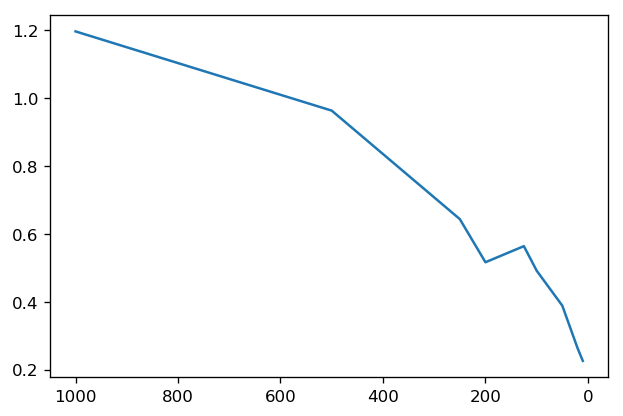

In [34]:
plt.figure(dpi=120)
plt.gca().invert_xaxis() 
plt.plot(time_for_test,mean_error)